# Import libraries and dataframe

In [11]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import plot_confusion_matrix
from scoring_functions import scoring_functions as f

# imp allows to reload the above function file when tinkering with it without kernel restart
import imp

import matplotlib.pyplot as plt

/var/folders/s7/0qdrwpwd3sj9gjh36hqxswt00000gn/T/ipykernel_35829/3568315622.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [13]:
df = pd.read_csv('complaints_processed_1year.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['narrative'].isnull().sum()

0

## Clean up dataframe 

In [15]:
df = df.dropna()

In [16]:
df.tail()

,product,narrative,processed narrative
143657,Mortgage and loans,"XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX, VA X...",va may concern would like file complaint salli...
143658,Mortgage and loans,Good day I sent this letter Via MR Cooper Inte...,good day sent letter via mr cooper internal me...
143659,Mortgage and loans,We have two very critical complaints. \nPart 1...,two critical complaint part gm financial onlin...
143660,Mortgage and loans,I took out a loan back in XXXX of XXXX for {$4...,took loan back used vehicle collateral loan ta...
143661,Mortgage and loans,I have tried to explain i lost job due to covo...,tried explain lost job due covod able find job...


In [17]:
df.loc[df['narrative'] == 'name']

,product,narrative,processed narrative


In [18]:
df.shape

(143655, 3)

In [19]:
df.drop(df.loc[df['narrative'] == 'name'].index, inplace=True)
df.shape

(143655, 3)

In [20]:
df.tail()

,product,narrative,processed narrative
143657,Mortgage and loans,"XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX, VA X...",va may concern would like file complaint salli...
143658,Mortgage and loans,Good day I sent this letter Via MR Cooper Inte...,good day sent letter via mr cooper internal me...
143659,Mortgage and loans,We have two very critical complaints. \nPart 1...,two critical complaint part gm financial onlin...
143660,Mortgage and loans,I took out a loan back in XXXX of XXXX for {$4...,took loan back used vehicle collateral loan ta...
143661,Mortgage and loans,I have tried to explain i lost job due to covo...,tried explain lost job due covod able find job...


## Change product names to integers

In [21]:
df['product'].unique()

array(['Mortgage and loans', 'credit_related'], dtype=object)

In [22]:
product_dict ={'credit_related': 0, 'Mortgage and loans': 1}

In [23]:
df['product'].replace(product_dict, inplace=True)

In [24]:
df['product'].unique()

array([1, 0])

In [25]:
df['product'].value_counts()

0    121100
1     22555
Name: product, dtype: int64

# Train-test split

In [26]:
X = df.drop(['product'], axis=1)
y = df['product']

X_train, X_test, y_train, y_test = train_test_split(X['narrative'], y, test_size=0.2, random_state=100)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

In [28]:
X_train.shape

(91939,)

In [37]:
y_train.shape

(91939,)

In [125]:
X_val.shape

(22985,)

In [126]:
X_test.shape

(28731,)

In [30]:
y_train.head(20)

84751     1
42804     0
33696     0
49481     0
4491      0
36156     0
118475    1
49623     0
2530      0
129703    0
87786     0
70044     1
43232     1
44317     0
80187     1
51624     0
101060    0
38679     0
46168     0
134888    0
Name: product, dtype: int64

y_train.shape

In [55]:
# CountVector
vectorizer = CountVectorizer(ngram_range=(2,3),stop_words = 'english', min_df = 10, max_features = 500000)
vect_X_train = vectorizer.fit_transform(X_train)
feature_names =  vectorizer.get_feature_names()

/Users/keqiaoli/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
len(feature_names)

122788

In [57]:
vect_X_val = vectorizer.transform(X_val)
vect_X_test = vectorizer.transform(X_test)

In [58]:
type(y_train)

pandas.core.series.Series

In [59]:
type(vect_X_train)

scipy.sparse._csr.csr_matrix

In [60]:
# train logistic regression model

In [127]:
from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=0, fit_intercept=False, max_iter = 10000).fit(vect_X_train, y_train)
clf = LogisticRegression(random_state=0, fit_intercept=False, max_iter = 10000).fit(vect_X_train, y_train)

# clf.predict(vect_X_train)

In [128]:
train_y_pred_proba = clf.predict_proba(vect_X_train)
train_y_predict_prob_class_1 = train_y_pred_proba[:,1]
train_y_predict_class = [1 if train_y_predict_prob_class_1[i] > 0.96 else 0 for i in range(len(train_y_predict_prob_class_1))]

In [129]:
f'The accuracy score is: {round(accuracy_score(y_train, train_y_predict_class)*100, 2)}%'

'The accuracy score is: 94.28%'

Accuracy: 94.3%
Precision: 96.8%
Recall: 81.8%
F1: 87.2%


Classification Report


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     77516
           1       1.00      0.64      0.78     14423

    accuracy                           0.94     91939
   macro avg       0.97      0.82      0.87     91939
weighted avg       0.95      0.94      0.94     91939



/Users/keqiaoli/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


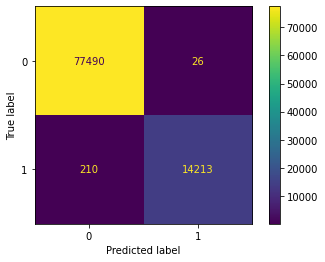

In [130]:
imp.reload(f)
f.scoring(y_train, train_y_predict_class, clf, vect_X_train)

# Run model on Validation dataset

In [131]:
val_pred_proba = clf.predict_proba(vect_X_val)

In [132]:
val_y_predict_prob_class_1 = val_pred_proba[:,1]

In [135]:
val_y_predict_class = [1 if val_y_predict_prob_class_1[i] > 0.96 else 0 for i in range(len(val_y_predict_prob_class_1))]

In [136]:
len(y_predict_class)

22985

Accuracy: 92.4%
Precision: 94.4%
Recall: 76.5%
F1: 82.2%


Classification Report


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     19393
           1       0.97      0.53      0.69      3592

    accuracy                           0.92     22985
   macro avg       0.94      0.77      0.82     22985
weighted avg       0.93      0.92      0.91     22985



/Users/keqiaoli/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


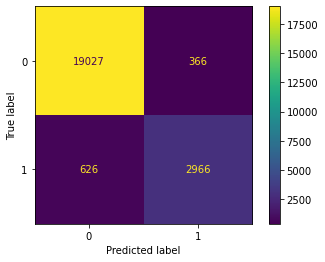

In [137]:
f.scoring(y_val, val_y_predict_class, clf, vect_X_val)

In [138]:
FN_pred_prob = [y_predict_prob_class_1[i] if y_predict_prob_class_1[i] < 0.96 else 0 for i in range(len(y_predict_prob_class_1))]

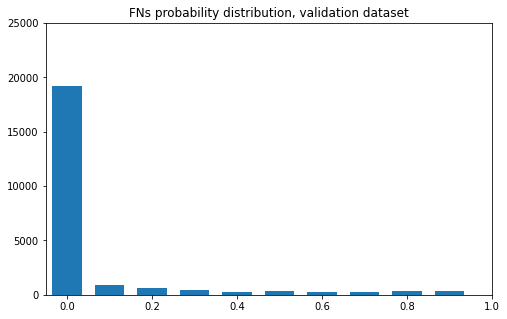

In [144]:
plt.figure(figsize = (8, 5))
plt.hist(FN_pred_prob, bins=10, range = [0,1], rwidth=0.7, align='left')
plt.xlim(-0.05,1)
plt.ylim(0, 25000)
plt.title('FNs probability distribution, validation dataset')
plt.show()

Accuracy: 92.2%
Precision: 94.2%
Recall: 76.1%
F1: 81.8%


Classification Report


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     24191
           1       0.97      0.53      0.68      4540

    accuracy                           0.92     28731
   macro avg       0.94      0.76      0.82     28731
weighted avg       0.93      0.92      0.91     28731



/Users/keqiaoli/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


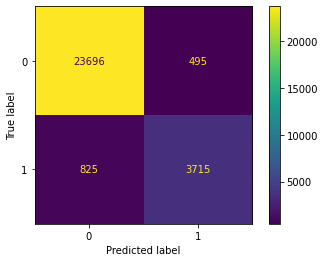

In [140]:
test_pred_proba = clf.predict_proba(vect_X_test)
test_y_predict_prob_class_1 = test_pred_proba[:,1]
test_y_predict_class = [1 if test_y_predict_prob_class_1[i] > 0.96 else 0 for i in range(len(test_y_predict_prob_class_1))]
f.scoring(y_test, test_y_predict_class, clf, vect_X_test)

In [141]:
test_FN_pred_prob = [test_y_predict_prob_class_1[i] if test_y_predict_prob_class_1[i] < 0.96 else 0 for i in range(len(test_y_predict_prob_class_1))]

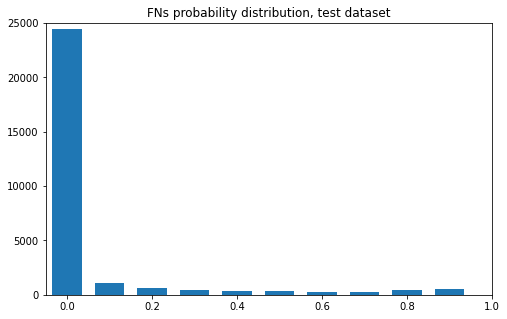

In [143]:
plt.figure(figsize = (8, 5))
plt.hist(test_FN_pred_prob, bins=10, range = [0,1], rwidth=0.7, align='left')
plt.xlim(-0.05,1)
plt.ylim(0, 25000)
plt.title('FNs probability distribution, test dataset')
plt.show()

## Instatiate training set

For TF-IDF, do `fit_transform` on _X\_train_ only. Do not involve _y\_train_ because it doesn't involve the words, just the classes.

In [18]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2))
# vect_X_train = vectorizer.fit_transform(X_train)
# feature_names =  vectorizer.get_feature_names()

In [19]:
# vect_X_train

In [20]:
# len(feature_names)

In [21]:
# vect_X_train.shape

In [22]:
# vect_X_train.todense()

Don't have the memory to get it `todense()`

I don't think I'll need that many feature names (1700000). Going forward, I'll cut it down to 1000000 which is 58%

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
vect_X_train = vectorizer.fit_transform(X_train)
feature_names =  vectorizer.get_feature_names()

In [17]:
len(feature_names)

1000000

In [18]:
vect_X_train.shape

(129924, 1000000)

Use `fit_transform()` on training data and `transform()` on test data. The model has already been fit on the training data, so you don't want to fit it again.

In [14]:
vect_X_test = vectorizer.transform(X_test)

# Create first model

## Create Naive Bayes model and predict

Instantiate new model instance. Fit the model to all the training data.

In [35]:
cls = MultinomialNB()
cls.fit(vect_X_train, y_train)

MultinomialNB()

Now that the model has been trained on the vectorized training data, see how it will predict classes from that test data. 

In [36]:
# y_pred = cls.predict(vect_X_test)
y_pred = cls.predict(vect_X_train)

In [37]:
np.unique(y_pred)

array([0, 1, 2, 3, 4], dtype=int64)

Compare how accurate the real test data is to what the model predicted

In [38]:
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 72.02%'

Accuracy: 72.0%
Precision: 89.9%
Recall: 49.9%
F1: 58.0%


Classification Report


              precision    recall  f1-score   support

           0       0.67      1.00      0.80     73012
           1       0.96      0.23      0.37     18544
           2       0.97      0.54      0.70     15180
           3       0.94      0.25      0.40     12364
           4       0.96      0.48      0.64     10824

    accuracy                           0.72    129924
   macro avg       0.90      0.50      0.58    129924
weighted avg       0.80      0.72      0.68    129924



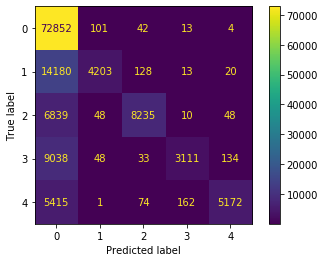

In [39]:
imp.reload(f)
f.scoring(y_train, y_pred, cls, vect_X_train)

## Check for overfitting

In [40]:
test_y_pred = cls.predict(vect_X_test)

In [41]:
f'The accuracy score is: {round(accuracy_score(y_test, test_y_pred)*100, 2)}%'

'The accuracy score is: 66.75%'

In [71]:
recall_scr = round(recall_score(y_test, test_y_pred, average='binary'), 2) * 100
f'The recall score is {recall_scr}%'

NameError: name 'test_y_pred' is not defined

Accuracy: 66.7%
Precision: 86.9%
Recall: 40.6%
F1: 46.8%


Classification Report


              precision    recall  f1-score   support

           0       0.63      1.00      0.77     18159
           1       0.91      0.14      0.25      4601
           2       0.96      0.40      0.56      3810
           3       0.91      0.15      0.26      3200
           4       0.94      0.34      0.50      2711

    accuracy                           0.67     32481
   macro avg       0.87      0.41      0.47     32481
weighted avg       0.76      0.67      0.60     32481



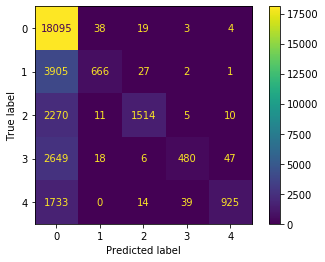

In [44]:
f.scoring(y_test, test_y_pred, cls, vect_X_test)

# Comparing models

| model             | train accuracy | test accuracy | train recall macro | test recall macro | accuracy difference | recall macro difference | Notes                                                                                                                       |
|-------------------|----------------|---------------|--------------------|-------------------|---------------------|-------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| MutlinomialNB     | 72             | 67            | 58                 | 47                | 5                   | 11                      | Many individual categories had poor recall. Model favors class with most data points. Any refinements would need weighting. |
| RandomForest      | 58             | 57            | 23                 | 22                | 1                   | 1                       | Well fitted, but not great performance. Model favors class with most data points.                                           |
| DecisionTree      | 90             | 82            | 85                 | 74                | 8                   | 11                      | Good recall with individual categories on train and test. Fitted OK.                                                        |
| KNN               | 100            | 81            | 99                 | 74                | 19                  | 25                      | Category recall scores not as good. Poor fit between train & test, class recall scores off. Model takes a long time to run. |
| Gradient Boosting | 85             | 84            | 81                 | 80                | 1                   | 1                       | Well fitted. Some classes have so-so recall comparisons. Takes long to run.                                                 |
| XGBoost           | 83             | 83            | 78                 | 78                | 0                   | 0                       | Very well fitted. Some classes have so-so recall.                                                                           |

**For Refinements**   

Gradient Boosting and XGBoost are similar, but Gradient Boosting is a little better. 

MultinomalNB might do better with SMOTE or `class_weight`. 

Decision Tree has the best accuracy. Might be worth seeing with refinements